### Missing data
Why do we have missing data in our dataset?
1. Lack of information in a specific domain
2. People may not have answered
3. Errors in the collection 

Based on that, it's important to not depend on a single data source!

Once we have data coming from multiple sources, we may still have missing data and this data can be split into two main categories:
1. Continuous data
2. Discrete data (aka categorical data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

### What is Missing completely at random (MCAR)?
Data is MCAR when the probability of getting a missing value is the same for any record. Beyond that, data is MCAR if there is absolutely no relationship between the missing values and any other values (observed or mssing).

Age and cabin are not missing at random since the data have been collected after the accident had happened and those information could not be retrieved.

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### The oposite of MCAR is Systematic missing value
There is some relationship between the missing value and any other value (observed or missing).

In [4]:
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

In [5]:
df.cabin_null.mean()

0.7710437710437711

The majority of missing cabins corresponds to those who died which is True

In [6]:
df.groupby('Survived').agg({'cabin_null':'mean'})

,cabin_null
Survived,
0,0.876138
1,0.602339


### Techniques for handling missing values
1. Mean/median/mode replacement
2. Random sample imputation
3. Capture of NaN values with a new feature
4. End of Distribuition imputation
5. Arbitrary Imputation
6. Frequent category imputation

## Dealing with numeric variable

### 1. Mean/median
1. Mean and median are used with continuous data and data is MCAR
2. We need to be careful with mean since it can be heavily affected by outliers

In [7]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
## Percentage of missing values
df.isnull().sum()/df.shape[0]

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

## 1.1 Using the median

In [10]:
def impute_missing(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)

In [11]:
median = df['Age'].median()

In [12]:
median

28.0

In [13]:
impute_missing(df,'Age',median)

In [14]:
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


As we can see the mean of both distribuitions is basically the same whereas the standard deviation after replacing the missing values with the median became lower (narrowed curve - blue)

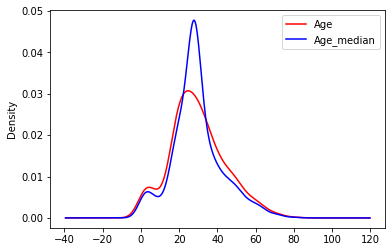

In [15]:
df['Age'].plot(kind='kde',color='red')
df['Age_median'].plot(kind='kde',color='blue')
plt.legend()

## 1.2 Using the mean

In [16]:
def impute_missing(df,variable,mean):
    df[variable+'_mean'] = df[variable].fillna(mean)

In [17]:
mean = df['Age'].mean()

In [18]:
mean

29.69911764705882

In [19]:
impute_missing(df,'Age',mean)

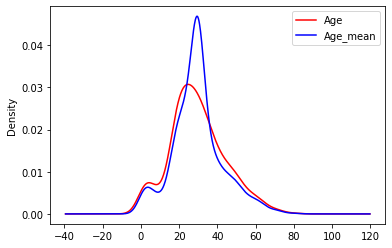

In [20]:
df['Age'].plot(kind='kde',color='red')
df['Age_mean'].plot(kind='kde',color='blue')
plt.legend()

In [21]:
df.describe()

,Survived,Age,Fare,Age_median,Age_mean
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,32.204208,29.361582,29.699118
std,0.486592,14.526497,49.693429,13.019697,13.002015
min,0.000000,0.420000,0.000000,0.420000,0.420000
25%,0.000000,20.125000,7.910400,22.000000,22.000000
50%,0.000000,28.000000,14.454200,28.000000,29.699118
75%,1.000000,38.000000,31.000000,35.000000,35.000000
max,1.000000,80.000000,512.329200,80.000000,80.000000


## Advantages:
    - Fast implementation
    - Median is robust to outliers
## Disadvantages:
    - The transformed variable may be distorted because of the change on variance

### 2. Random Sample Imputation
1. It consists of taking random sample from the dataset and use this sample to replace the NaN values
2. It assumes the data is MCAR

In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [24]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [25]:
def impute_missing(df, variable):
    df[variable+'_random'] = df[variable]
    #create a random sample of size equals to the amount of null values in the variable
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state = 0)
    # matches the indexes for further join
    random_sample.index = df[df[variable].isnull()].index
    # replaces the null values with the random sample
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [26]:
impute_missing(df,'Age')

In [27]:
df.head()

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [28]:
import matplotlib.pyplot as plt

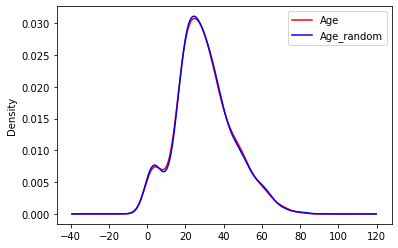

In [29]:
df['Age'].plot(kind='kde' ,color='red')
df['Age_random'].plot(kind='kde', color='blue')
plt.legend()

## Advantages:
    - Fast and easy implementation
    - Less distortion in variance
## Disadvantages:
    - Randomness wont work in every situation(it needs a try before making any conclusion)

### 3. Capture NaN value with a new feature
- it works well if the variable is not missing completely at random

In [30]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [31]:
#new feature
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)

In [32]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


## Advantages
    - Easy to implement
    - Capture the importance of missing values (labeled as 1)
    
## Disadvantages
    - Creates additional features. For every Feature with missing values, we create a new feature to track those missing values

## 4. End of Distribuition
- Captures the end of th distribution, considering values on far right or left(check where we have outliers)

In [63]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [64]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

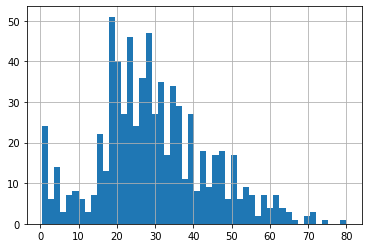

In [65]:
df.Age.hist(bins=50)

In [66]:
df.Age.mean()

29.69911764705882

In [67]:
extreme = df.Age.mean() + 3*(df.Age.std())

In [68]:
import seaborn as sns

<AxesSubplot:xlabel='Age'>

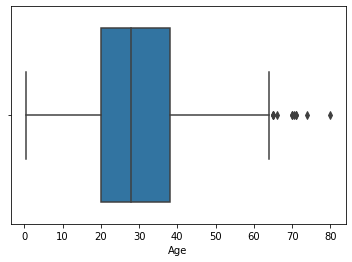

In [69]:
sns.boxplot('Age',data=df)

In [70]:
def impute_nan(df,variable,extreme,median):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [71]:
impute_nan(df,'Age',extreme,df.Age.median())

In [72]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

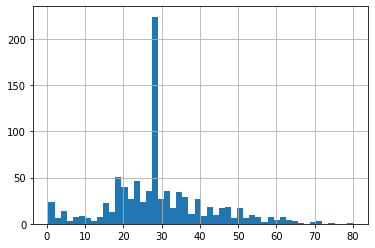

In [74]:
df.Age.hist(bins=50)

<AxesSubplot:>

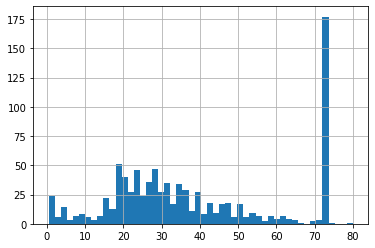

In [75]:
df.Age_end_distribution.hist(bins=50)

<AxesSubplot:xlabel='Age_end_distribution'>

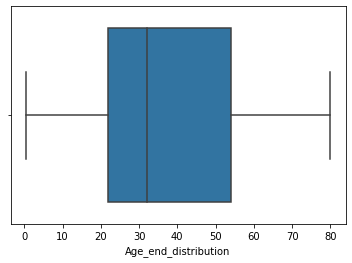

In [76]:
## no outliers!
sns.boxplot('Age_end_distribution',data=df)

## Advantages
    - easy to implement
    - captures the importance of missingness
## Disadvantages
    - distorts the original distribution
    - if the number of missing values is big, it will hide the true outliers and hence affect the predictive power of the original variable 
    - if the number of missing values is small, the replace missing values may be considered an outlier

## 5. Arbitrary value imputation
- Consists of replacing NaN by an arbitrary value

In [77]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [78]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

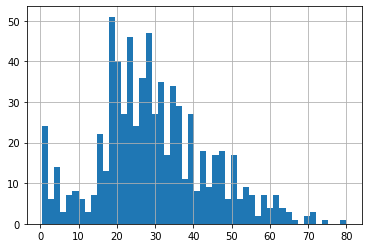

In [80]:
df.Age.hist(bins=50)

#### Arbitrary: 
    - it should not be more frequentely in the distribution

In [79]:
def impute_nan(df,variable):
    #decided for Zero
    df[variable+'_zero'] = df[variable].fillna(0)

In [81]:
impute_nan(df,'Age')

<AxesSubplot:>

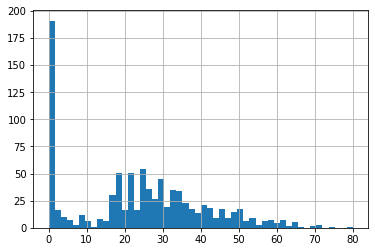

In [82]:
df.Age_zero.hist(bins=50)

## Advantages
    - Easy to implement
    - captures the importance of missing values
## Disadvantages
    - distorts the original ditribution
    - hard to decide which value to use